[<img src="https://www.digitalhouse.com/ar/logo-DH.png" width="400" height="200" align='right'>](http://digitalhouse.com.ar/)

# GRUPO 1 - Desafío 2
## Construcción de un modelo de regresión a partir de Dataset de Properati 


## 1. Introducción

En primer lugar, leeremos el archivo "amba.csv", que es el resultado de la limpieza de datos del dataset de Properati, realizada en el Desafío 1.

Una vez chequeados los atributos principales del Dataset, a partir de la librería Scikit Learn, realizaremos un split del dataset en "train" y "test" para entrenar nuestros modelos de regresión y ver cómo performan.

A continuación realizaremos el tratamiento de las features, o columnas, separando las categóricas de las numéricas, para crear las variables "dummies" a través de OneHotEncoder.
Las variables numéricas podemos normalizarlas o no, podemos ver el desempeño del modelo en ambos casos.

Con las matrices de features y target listas, podemos empezar a entrenar nuestros modelos.

En primer lugar realizaremos una regresión lineal con el método OLS de la librería Stats Model.

In [1]:
# Importamos las librerías necesarias para trabajar con Dataframes y realizar algunas gráficas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [202]:
data = pd.read_csv('amba.csv',sep=',')
data

,Tipo de propiedad,Provincia,Precio,Moneda,Precio aproximado ($),Precio aproximado (U$S),Superficie total en m2,Superficie cubierta en m2,Precio U$S por m2,Precio por m2,Habitaciones,Descripción,Título,Localidad,Descripción limpia,Dormitorios descripción,cochera,amenities,Ambientes descripción,Precio (U$S) final
0,PH,Capital Federal,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,Mataderos,"2 ambientes tipo casa planta baja por pasillo,...",1,sin_cochera,sin_amenities,2,62000.0
1,Departamento,Capital Federal,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,Mataderos,2 ambientes 3er piso lateral living comedor am...,1,sin_cochera,sin_amenities,2,72000.0
2,Departamento,Capital Federal,75000.0,USD,1323337.5,75000.0,43.0,43.0,1744.186047,1744.186047,2.0,Departamento muy luminoso con todos sus ambien...,Departamento en venta floresta,Flores,departamento muy luminoso con todos sus ambien...,1,sin_cochera,sin_amenities,1,75000.0
3,Departamento,Capital Federal,145000.0,USD,2558452.5,145000.0,80.0,77.0,1812.500000,1883.116883,4.0,"Hermoso departamento de cuatro ambientes, refa...",Hermoso departamento de 4 ambientes refacciona...,Boedo,"hermoso departamento de 4 ambientes, refaccion...",1,sin_cochera,sin_amenities,4,145000.0
4,Departamento,Capital Federal,480000.0,USD,8469360.0,480000.0,220.0,130.0,2181.818182,3692.307692,3.0,"Espectacular loft de exclusivo diseño, 210 ms,...","Venta depto,loft, Cañitas,210 ms,pileta propia...",Las Cañitas,"espectacular loft de exclusivo diseño, 210 ms,...",1,cochera,amenities,5,480000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14291,Departamento,Bs.As. G.B.A. Zona Sur,148000.0,USD,2611386.0,148000.0,82.0,70.0,1804.878049,2114.285714,NaN,Casuarinas Garden. Entrega Septiembre 2018.Es ...,Departamento - Casuarinas Garden,Canning,casuarinas garden. entrega septiembre 2018.es ...,2,cochera,amenities,3,148000.0
14292,Departamento,Bs.As. G.B.A. Zona Sur,115000.0,USD,2029117.5,115000.0,40.0,40.0,2875.000000,2875.000000,NaN,Muy buen departamento de 2 ambientes con coche...,Muy buen 2 AMB C/COCHERA CON RENTA H/2019.- Ba...,Banfield,muy buen departamento de 2 ambientes con coche...,1,cochera,sin_amenities,2,115000.0
14293,Departamento,Bs.As. G.B.A. Zona Sur,180000.0,USD,3176010.0,180000.0,65.0,65.0,2769.230769,2769.230769,NaN,Departamento de 3 ambientes totalmente recicla...,Departamento - Lomas de Zamora Oeste,Lomas de Zamora,departamento de 3 ambientes totalmente recicla...,2,cochera,sin_amenities,3,180000.0
14294,Departamento,Bs.As. G.B.A. Zona Sur,145000.0,USD,2558452.5,145000.0,80.0,80.0,1812.500000,1812.500000,NaN,CODIGO: 2912-D1184V ubicado en: Riobamba 50 - ...,Departamento 3 ambientes en venta con cochera ...,Lanús,codigo: 2912-d1184v ubicado en: riobamba 50 - ...,2,cochera,amenities,3,145000.0


In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14296 entries, 0 to 14295
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tipo de propiedad          14296 non-null  object 
 1   Provincia                  14296 non-null  object 
 2   Precio                     14296 non-null  float64
 3   Moneda                     14296 non-null  object 
 4   Precio aproximado ($)      14296 non-null  float64
 5   Precio aproximado (U$S)    14296 non-null  float64
 6   Superficie total en m2     14296 non-null  float64
 7   Superficie cubierta en m2  13584 non-null  float64
 8   Precio U$S por m2          14296 non-null  float64
 9   Precio por m2              13584 non-null  float64
 10  Habitaciones               5764 non-null   float64
 11  Descripción                14296 non-null  object 
 12  Título                     14296 non-null  object 
 13  Localidad                  14296 non-null  obj

In [204]:
# Vemos que odavía tenemos algunas columnas con datos faltantes. Por ahora no las utilizaremos, asique procedemos a dropearlas.

data.drop(["Superficie cubierta en m2","Precio por m2",'Habitaciones'],axis=1,inplace=True)

# También dropeamos las columnas relacionadas al Precio, ya que aunque contengan información completa, no podremos utilizarla
# como feature del modelo, ya que están directamente relacionadas con nuestra variable target (precio por m2)

data.drop(['Precio','Precio (U$S) final','Precio aproximado ($)','Precio aproximado (U$S)'],axis=1,inplace=True)

#Por último también dropeamos aquellas columnas que sabemos que el modelo no podrá utilizar, como los campos de descripción
data.drop(['Descripción','Descripción limpia','Título','Moneda'],axis=1,inplace=True)


data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14296 entries, 0 to 14295
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tipo de propiedad        14296 non-null  object 
 1   Provincia                14296 non-null  object 
 2   Superficie total en m2   14296 non-null  float64
 3   Precio U$S por m2        14296 non-null  float64
 4   Localidad                14296 non-null  object 
 5   Dormitorios descripción  14296 non-null  int64  
 6   cochera                  14296 non-null  object 
 7   amenities                14296 non-null  object 
 8   Ambientes descripción    14296 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1005.3+ KB


In [265]:
data.Provincia.value_counts()

Capital Federal             6174
Bs.As. G.B.A. Zona Norte    4519
Bs.As. G.B.A. Zona Oeste    1899
Bs.As. G.B.A. Zona Sur      1704
Name: Provincia, dtype: int64

In [205]:
#Vamos a agregar una variable, generada por nosotros, que será sup_X2 (Superficie total al cuadrado),
#ya que tenmos sospechas de que la relación entre la sup. y el valor x m2 no es lineal.

#data['sup_X2'] = data['Superficie total en m2']**2
#data.loc[:,['Superficie total en m2','sup_X2']]

Text(0, 0.5, 'Frecuencia')

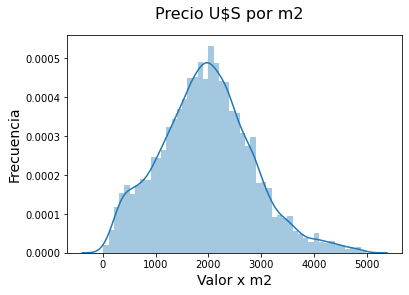

In [206]:
# Graficamos la distribución de la variable target
fig = plt.figure()
sns.distplot((data['Precio U$S por m2']),bins=50)
fig.suptitle('Precio U$S por m2', fontsize=16)                  # Plot heading 
plt.xlabel('Valor x m2', fontsize=14)                          # X-label
plt.ylabel('Frecuencia', fontsize=14)                          # Y-label

## Análisis de Correlación

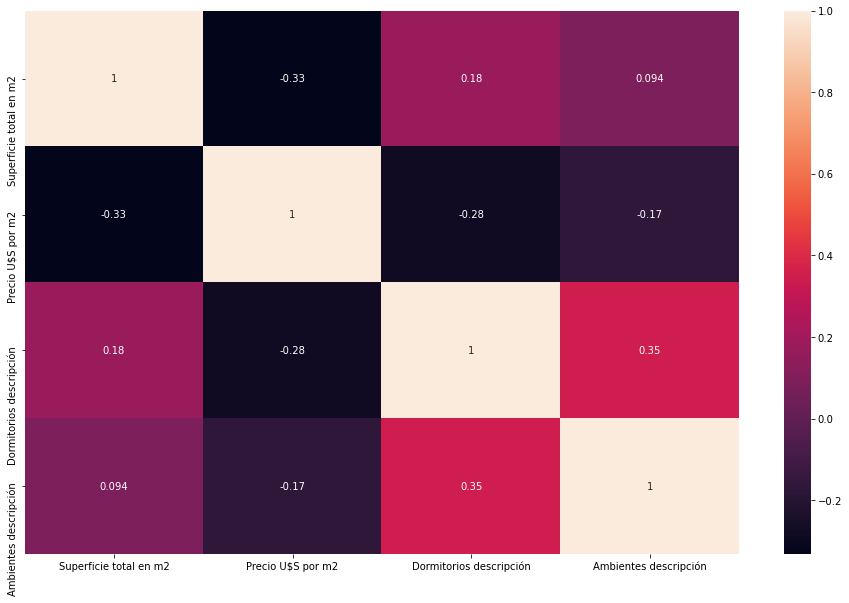

In [207]:
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(data.corr(),annot = True)

## Preparación de los datos (Target y Features)

Definimos como variable Target "Precio U$S por m2", y las features que deseamos utilizar.

In [327]:
feature_col = ['Superficie total en m2','Tipo de propiedad','Provincia', 'Localidad','cochera','amenities','Dormitorios descripción','Ambientes descripción']

y = data["Precio U$S por m2"]
X = data[feature_col]


Mediante el método train_test_split de sklearn, definimos nuestros set de entrenamiento y testeo

In [328]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

# Resetamos los índices

y_train.reset_index(drop=True,inplace=True)
X_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)


In [329]:
# Creo una lista de las columnas categoricas
cat_cols = [x for x in X.select_dtypes(include=['object']).columns]
cat_cols

['Tipo de propiedad', 'Provincia', 'Localidad', 'cochera', 'amenities']

In [330]:
# Creo una lista de las columnas numericas
num_cols = [x for x in X.columns if x not in cat_cols]
num_cols

['Superficie total en m2', 'Dormitorios descripción', 'Ambientes descripción']

Una vez separados los set de Train y Test, realizamos tratamiento de las columnas categóricas con OneHotEncoder para crear nustras variables dummies. 

Por el momento no vamos a eliminar ninguna columna y veremos que pasa.

In [331]:
from sklearn.preprocessing import OneHotEncoder

#Instanciamos nuestro encoder
onehot_encoder = OneHotEncoder(sparse=False,drop='first',handle_unknown='error')

X_one_hot_train = onehot_encoder.fit_transform(X_train[cat_cols])

#Convertimos la variable X_one_hot_train a DF para poder visualizar mejor, ya que el encoder crea un np.array

X_one_hot_train = pd.DataFrame(X_one_hot_train, columns = onehot_encoder.get_feature_names())
X_one_hot_train

,x0_Departamento,x0_Local,x0_PH,x1_Bs.As. G.B.A. Zona Oeste,x1_Bs.As. G.B.A. Zona Sur,x1_Capital Federal,x2_Abasto,x2_Abril Club de Campo,x2_Acacias Blancas,x2_Acassuso,...,x2_Villa Urquiza,x2_Villa Vatteone,x2_Villa de Mayo,x2_Villa del Parque,x2_Virreyes,x2_Wilde,x2_William Morris,x2_Zelaya,x3_sin_cochera,x4_sin_amenities
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10003,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10004,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
10005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Una vez trabajadas nuestras variables categóricas, concatenamos el DF creado con las variables numéricas, para generar el DF de trabajo final.
Notar que aún no se han normalizado los valores de las variables numéricas.

In [332]:
X_proc_train = pd.concat([X_train[num_cols],X_one_hot_train],axis=1)
X_proc_train

,Superficie total en m2,Dormitorios descripción,Ambientes descripción,x0_Departamento,x0_Local,x0_PH,x1_Bs.As. G.B.A. Zona Oeste,x1_Bs.As. G.B.A. Zona Sur,x1_Capital Federal,x2_Abasto,...,x2_Villa Urquiza,x2_Villa Vatteone,x2_Villa de Mayo,x2_Villa del Parque,x2_Virreyes,x2_Wilde,x2_William Morris,x2_Zelaya,x3_sin_cochera,x4_sin_amenities
0,50.0,1,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,42.0,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,67.0,2,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,197.0,3,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,110.0,3,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,95.0,3,4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10003,76.0,1,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10004,70.0,2,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
10005,1116.0,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Normalización de los Datos

In [333]:
#defining a normalisation function 

#def normalize (x): 
#   if max(x) == min(x):
#        return x
#    else:
#        return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
#X_proc_esc_train = X_proc_train.apply(normalize)

## Entrenamiento del modelo OLS con Stats Model

Ahora con nuestros set de train y test listos, importamos la librería de Stats Model para generar un modelo de regresión OLS.


In [334]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Debemos agregar un término costante para la definición del intercepto
X_proc_train = sm.add_constant(X_proc_train)

In [336]:
# "Fiteamos" el modelo

lm = sm.OLS(y_train,X_proc_train).fit()  

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      Precio U$S por m2   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     61.51
Date:                Thu, 14 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:58:00   Log-Likelihood:                -76288.
No. Observations:               10007   AIC:                         1.532e+05
Df Residuals:                    9672   BIC:                         1.557e+05
Df Model:                         334                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Ahora aplicamos normalización a las variables numéricas, y vemos si cambia el resultado:

In [337]:
#from sklearn import preprocessing

#X_proc_train_std = preprocessing.scale(X_proc_train[num_cols])
#y_train_std = preprocessing.scale(y_train)

Ahora vamos a probar el modelo con los datos de testeo, para lo cual tratamos el set de testeo de igua lforma que el anterior:

In [338]:
onehot_encoder.handle_unknown='ignore'   # importante una vez que aprendio las categorias configure para que ignore nuevas cat
X_one_hot_test = onehot_encoder.transform(X_test[cat_cols])
X_one_hot_test = pd.DataFrame(X_one_hot_test, columns = onehot_encoder.get_feature_names())


In [339]:
X_proc_test = pd.concat([X_test[num_cols],X_one_hot_test],axis=1)
X_proc_test

,Superficie total en m2,Dormitorios descripción,Ambientes descripción,x0_Departamento,x0_Local,x0_PH,x1_Bs.As. G.B.A. Zona Oeste,x1_Bs.As. G.B.A. Zona Sur,x1_Capital Federal,x2_Abasto,...,x2_Villa Urquiza,x2_Villa Vatteone,x2_Villa de Mayo,x2_Villa del Parque,x2_Virreyes,x2_Wilde,x2_William Morris,x2_Zelaya,x3_sin_cochera,x4_sin_amenities
0,90.0,3,4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,150.0,1,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,190.0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,58.0,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,72.0,1,4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4284,107.0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4285,86.0,2,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4286,304.0,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4287,90.0,2,4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [340]:
#agrego la columna para el intercept
X_proc_test = sm.add_constant(X_proc_test)

In [341]:
y_pred = lm.predict(X_proc_test)  
y_pred

0       2003.665271
1       3119.706299
2       1604.370292
3       2457.624483
4       2257.297281
           ...     
4284    1781.722831
4285    1991.572551
4286    1240.776000
4287    2756.017710
4288    1141.511922
Length: 4289, dtype: float64

Text(0, 0.5, 'Housing Price')

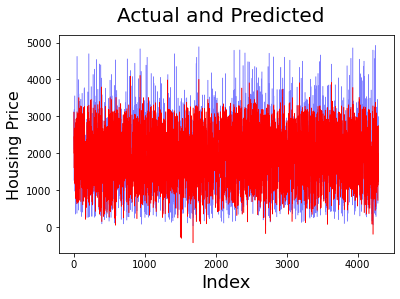

In [342]:
# Actual and Predicted
c = [i for i in range(1,4290,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=0.5, linestyle="-", alpha=0.5) #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=0.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)                       # Y-label

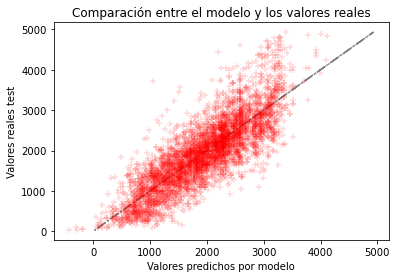

EMC: 242438.93403416904
r2_score: 0.6814914359469436


In [343]:
from sklearn.metrics import mean_squared_error, r2_score

# Graficamos el modelo

plt.scatter(y_pred, y_test, s=30, c='r',alpha=0.15, marker='+', zorder=10)
plt.plot(y_test,y_test, '-.',c='grey')
plt.xlabel("Valores predichos por modelo")
plt.ylabel("Valores reales test")
plt.title('Comparación entre el modelo y los valores reales')
plt.show()
print ("EMC:", mean_squared_error(y_test, y_pred))
print ("r2_score:", r2_score(y_test, y_pred))


Text(0, 0.5, 'Index')

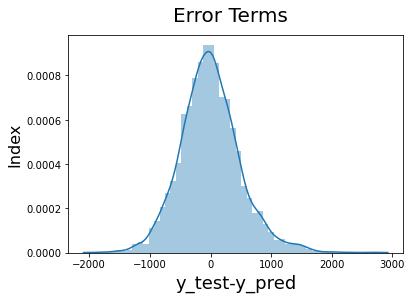

In [344]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

# Creación de modelos con regularización 

In [345]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## Ridge Regression

In [346]:
#Ridge
lm_ridge = linear_model.RidgeCV(alphas=[0.01,0.05,0.1,0.5, 1, 10], normalize=True,cv=10) 

model_ridge= lm_ridge.fit(X_proc_train, y_train)

y_pred_ridge = model_ridge.predict(X_proc_test)

print('Score Train model_ridge:', model_ridge.score(X_proc_train, y_train))
print('Score Test model_ridge:', model_ridge.score(X_proc_test, y_test))
print('Alpha: ', model_ridge.alpha_)


Score Train model_ridge: 0.6769732020610858
Score Test model_ridge: 0.6795167597687922
Alpha:  0.1


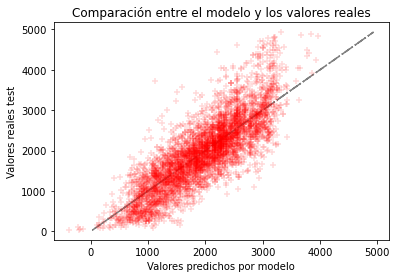

EMC: 243941.99687681822
r2_score Test: 0.6795167597687922


In [347]:
# Graficamos el modelo

plt.scatter(y_pred_ridge, y_test, s=30, c='r',alpha=0.15, marker='+', zorder=10)
plt.plot(y_test,y_test, '-.',c='grey')
plt.xlabel("Valores predichos por modelo")
plt.ylabel("Valores reales test")
plt.title('Comparación entre el modelo y los valores reales')
plt.show()
print ("EMC:", mean_squared_error(y_test, y_pred_ridge))
print ("r2_score Test:", r2_score(y_test, y_pred_ridge))


Text(0, 0.5, 'Index')

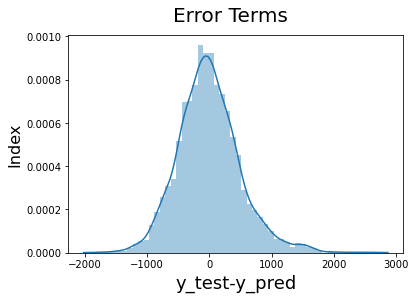

In [348]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_ridge),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

## Lasso Regression

In [349]:
#Lasso
lm_lasso = linear_model.LassoCV(alphas=[0.01,0.05,0.1,0.5, 1, 10], normalize=True,cv=10) 

model_lasso= lm_lasso.fit(X_proc_train, y_train)

y_pred_lasso = model_lasso.predict(X_proc_test)

print('Score Train model_lasso:', model_lasso.score(X_proc_train, y_train))
print('Score Test model_lasso:', model_lasso.score(X_proc_test, y_test))
print('Alpha: ', model_lasso.alpha_)

Score Train model_lasso: 0.6794786178610883
Score Test model_lasso: 0.6814988340551935
Alpha:  0.01


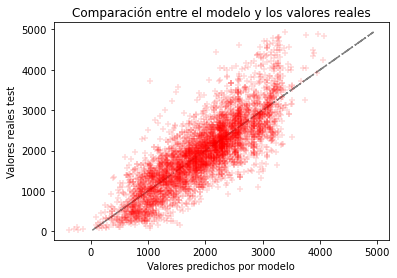

EMC: 242433.30282144703
r2_score: 0.6814988340551935


In [350]:
# Graficamos el modelo

plt.scatter(y_pred_lasso, y_test, s=30, c='r',alpha=0.15, marker='+', zorder=10)
plt.plot(y_test,y_test, '-.',c='grey')
plt.xlabel("Valores predichos por modelo")
plt.ylabel("Valores reales test")
plt.title('Comparación entre el modelo y los valores reales')
plt.show()

print ("EMC:", mean_squared_error(y_test, y_pred_lasso))
print ("r2_score:", r2_score(y_test, y_pred_lasso))


## Conclusiones 1:

Vemos que el desempeño, tanto en el modelo de regresión OLS, como en los modelos Ridge y Lasso, son similares, y los resultados con los set de Test son consistentes con los de entrenamiento, cercanos a 0,68 (R2).

Esta situación nos podría estar indicando, que dada la cantidad de features que tenemos, y el desempeño regular, podríamos estar en un escenario de underfitting. Con lo cual se explicaría el por qué los modelos de Ridge y Lasso no mejoran los rendimientos (el modelo no es lo suficientemente complejo).

Para ver si todavía es posible mejorar el modelo, podríamos agregar features "creadas" a partir de las existentes, creando alguna combinación entre ellas.
